<a href="https://colab.research.google.com/github/thesalmonification/DSCI400_Revamp/blob/master/2_NormOutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
########################################
"""This file was created to determine the outlier first noticed within
ChannelEnergy.ipynb. From this code, we determine that patient id 13 had
the outlier values. Furthermore, we determine that patient ids 12,15, and 26
were NEVER used. This ids most likely were involved in the other half of the
emotional data experiment that does not pertain to our project..."""

#Import the necessary modulues
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

Mount Google Drive

In [0]:
#Written in Google Collab: add drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the label and waveform keys to make HDF5 parsing easier

In [0]:
#Import the label (and essential waveform) keys of the HDF5

label_keys = pd.read_csv('/content/drive/Shared drives/DSCI400_Revamp/Label_Data_Keys.csv',header=None)
label_keys = list(label_keys[0])
print(label_keys)

['t2754_labels', 't276_labels', 't2762_labels', 't2760_labels', 't2750_labels', 't2752_labels', 't2764_labels', 't2756_labels', 't2758_labels', 't2766_labels', 't2748_labels', 't2744_labels', 't274_labels', 't2738_labels', 't2734_labels', 't2740_labels', 't2746_labels', 't2742_labels', 't2736_labels', 't2732_labels', 't3402_labels', 't3384_labels', 't3386_labels', 't3390_labels', 't3396_labels', 't34_labels', 't3400_labels', 't3394_labels', 't3388_labels', 't3398_labels', 't3392_labels', 't3382_labels', 't32_labels', 't3154_labels', 't3152_labels', 't3146_labels', 't3160_labels', 't3150_labels', 't3156_labels', 't3148_labels', 't3144_labels', 't3158_labels', 't3142_labels', 't396_labels', 't394_labels', 't3810_labels', 't392_labels', 't3806_labels', 't3802_labels', 't3804_labels', 't3800_labels', 't3808_labels', 't38_labels', 't3798_labels', 't3782_labels', 't3794_labels', 't3788_labels', 't3792_labels', 't3780_labels', 't3790_labels', 't3784_labels', 't3786_labels', 't3796_labels', 't

Build a dictionary of dictionaries to hold 2-norm values for every session for every patient id 1-30

In [0]:
#Build DataFrames to hold all 2-norm data...


data_dict = {}
chs = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3','P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6','FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

for feltEmo_val in range(1,31): # I have 30 patients numbered 1-30, add them to the dict with internal dicts to hold info for every channel...
  data_dict[feltEmo_val] = {}
  for ch in chs:
    data_dict[feltEmo_val][ch] = []

print(data_dict)

{1: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4': [], 'O2': []}, 2: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4': [], 'O2': []}, 3: {'Fp1': [], 'AF3': [], 'F3': [], 'F7': [], 'FC5': [], 'FC1': [], 'C3': [], 'T7': [], 'CP5': [], 'CP1': [], 'P3': [], 'P7': [], 'PO3': [], 'O1': [], 'Oz': [], 'Pz': [], 'Fp2': [], 'AF4': [], 'Fz': [], 'F4': [], 'F8': [], 'FC6': [], 'FC2': [], 'Cz': [], 'C4': [], 'T8': [], 'CP6': [], 'CP2': [], 'P4': [], 'P8': [], 'PO4

Calculate the 2-norms and store

In [0]:
#Iterate over all sessions and build corresponding plots...

for key in label_keys:
  print(key)
  session_labels = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Label_Data.h5',key=key).T #get the id value to determine the session patient...
  patient_id = int(session_labels['id'])

  #Open the session, calculate the 2-norm and add it to the data_dict
  session_df = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Data.h5',key=key[:-7]) #Note, here I use the trimmed waveforms as to make the two-norm calculations more equal across sessions...
  for ch in chs:
    signal_energy = np.linalg.norm(session_df[ch].to_numpy()) #Calculate the 2-norm energy of the signal...
    data_dict[patient_id][ch].append(signal_energy) #Add the signal energy to the data_dict

print(data_dict)


Make Box-and-Whisker plots to determine the outlier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

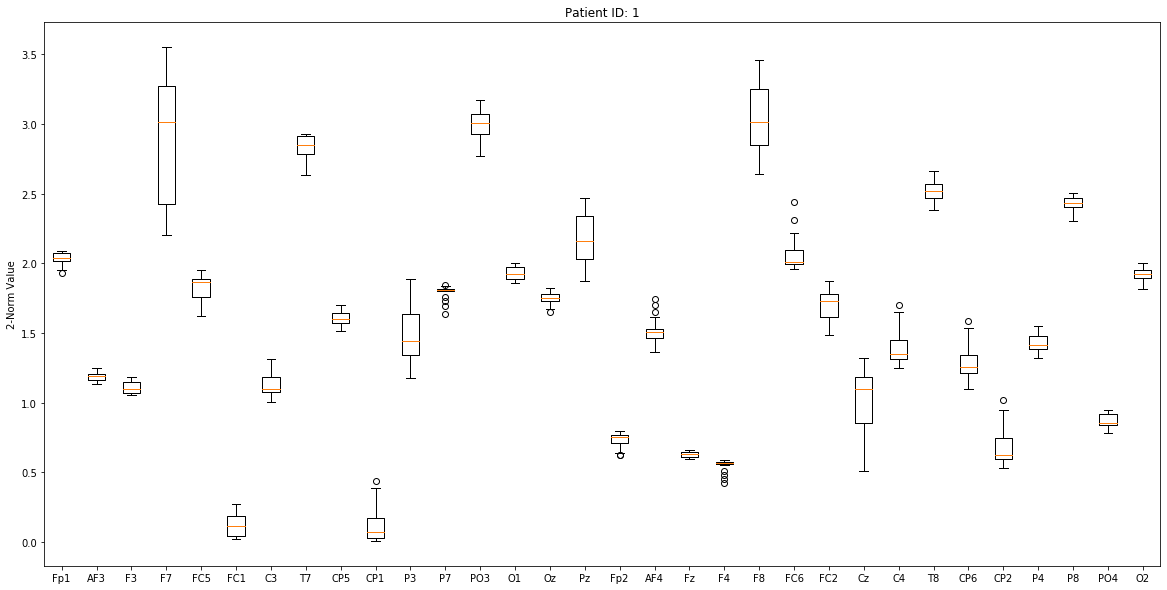

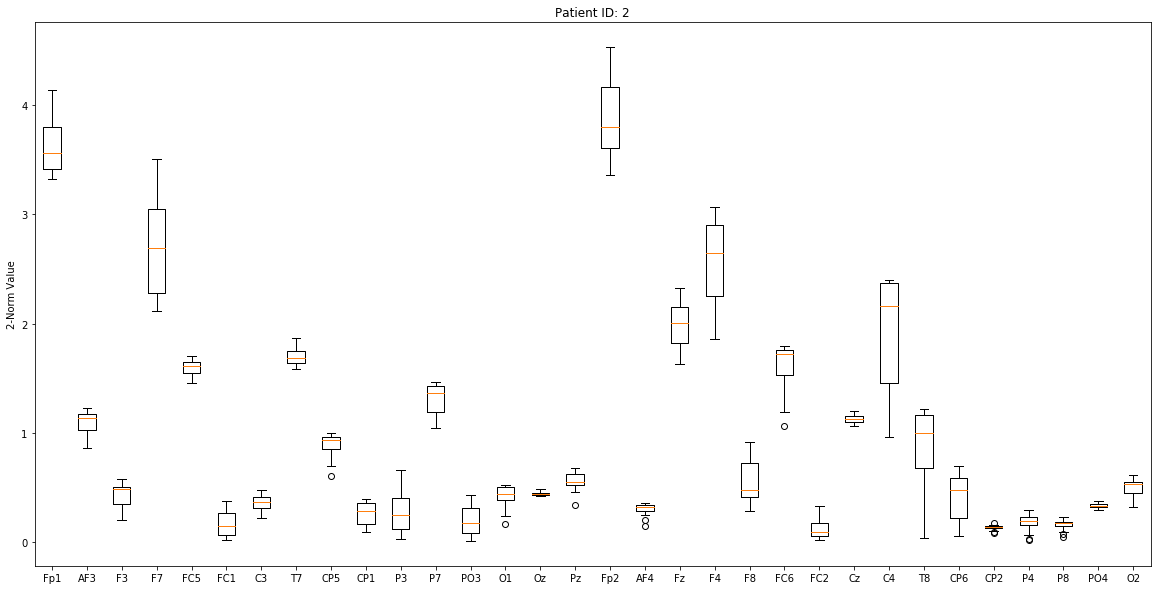

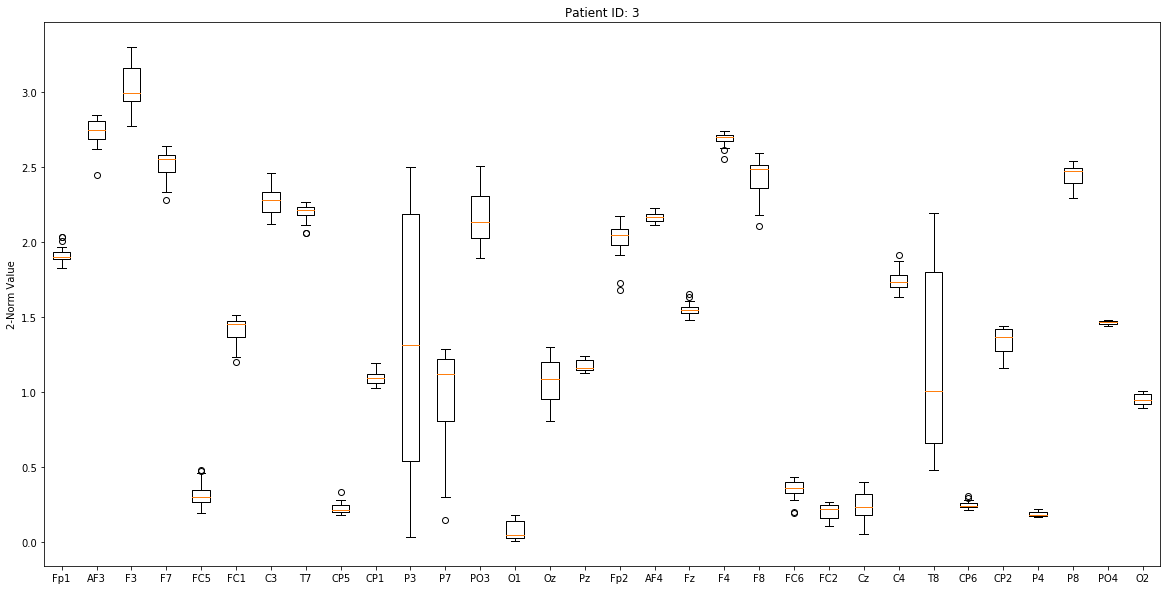

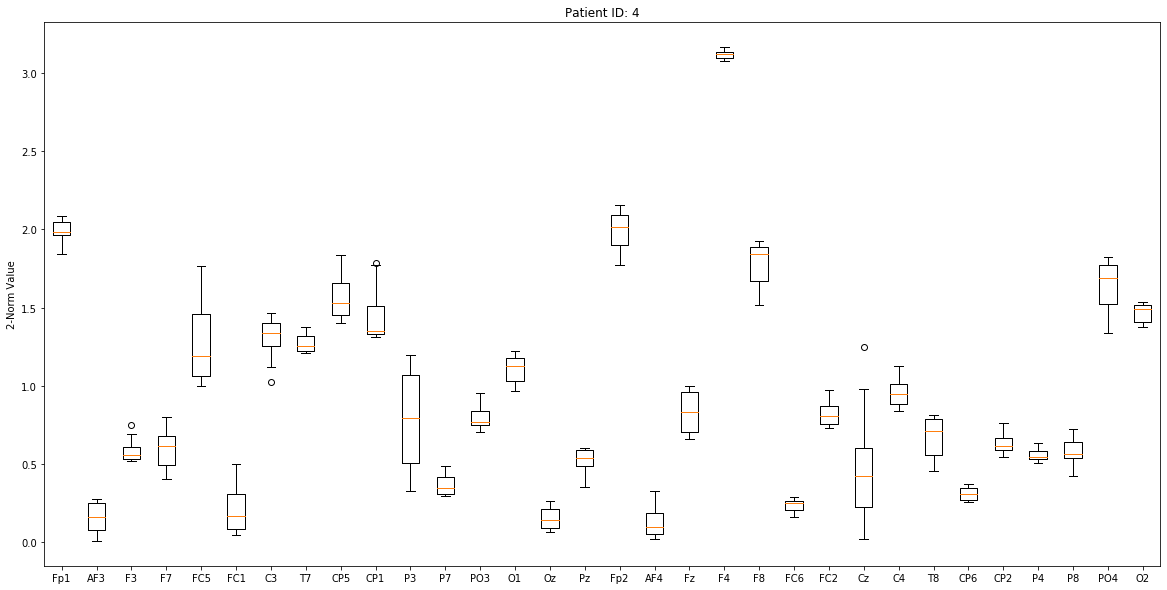

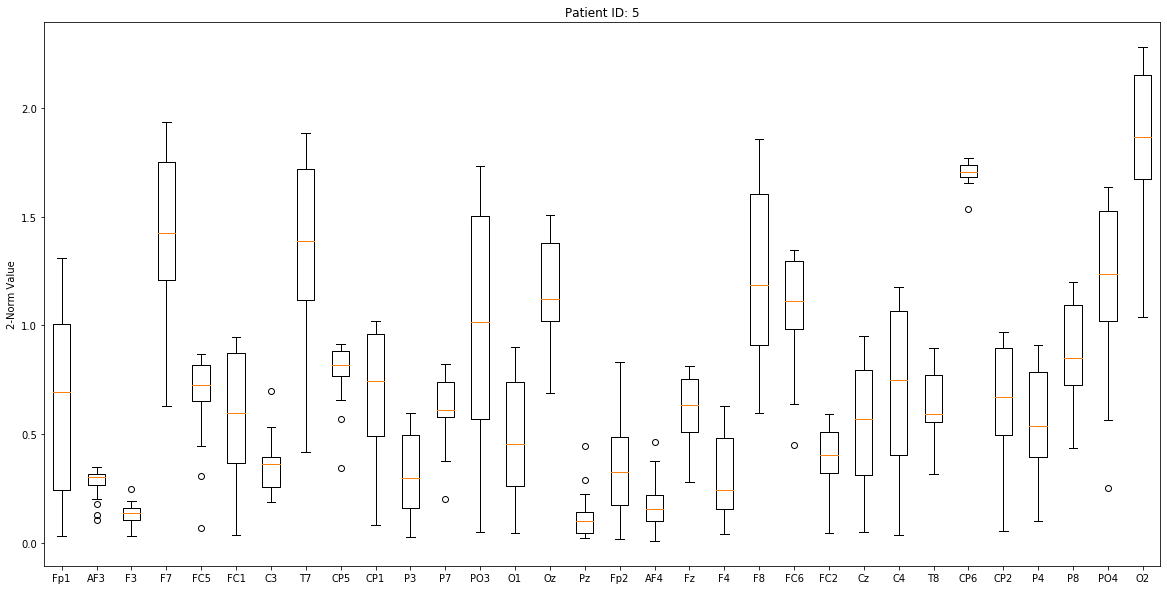

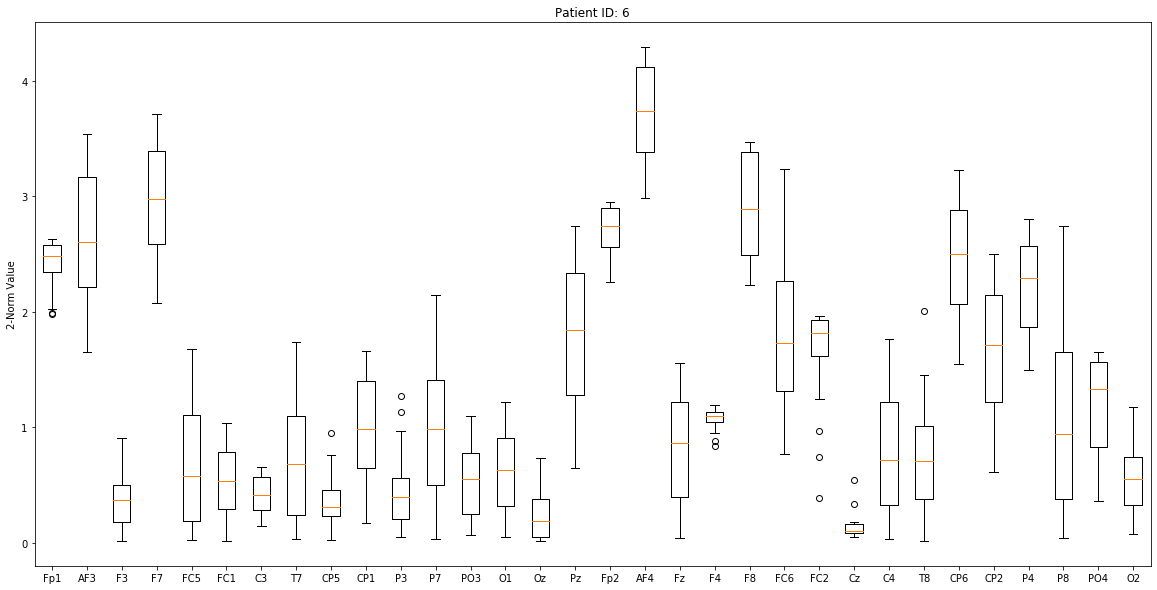

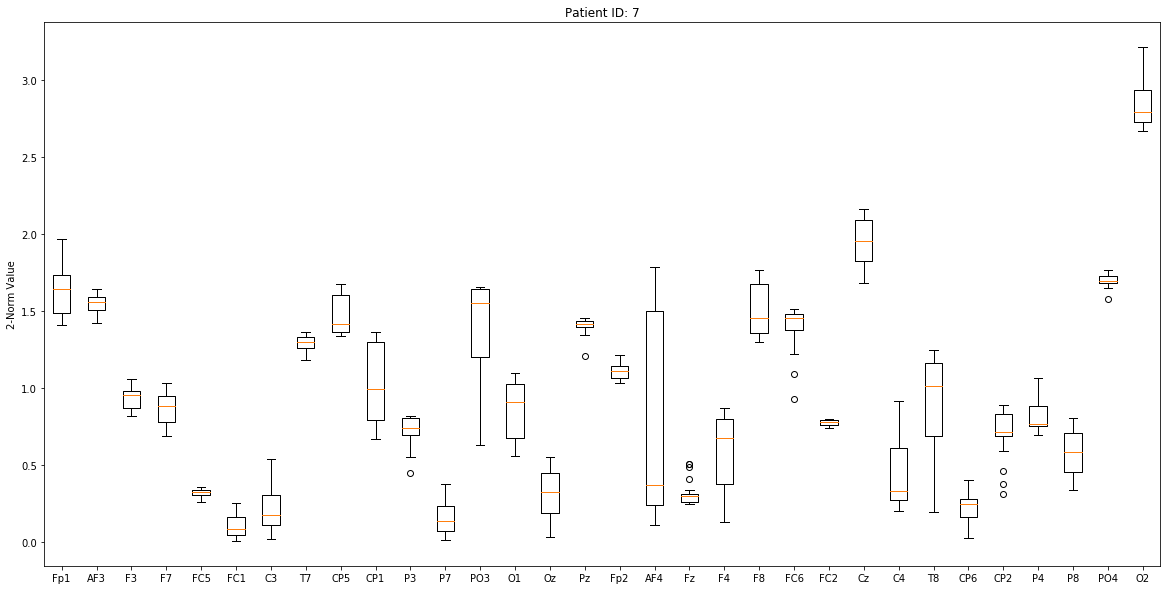

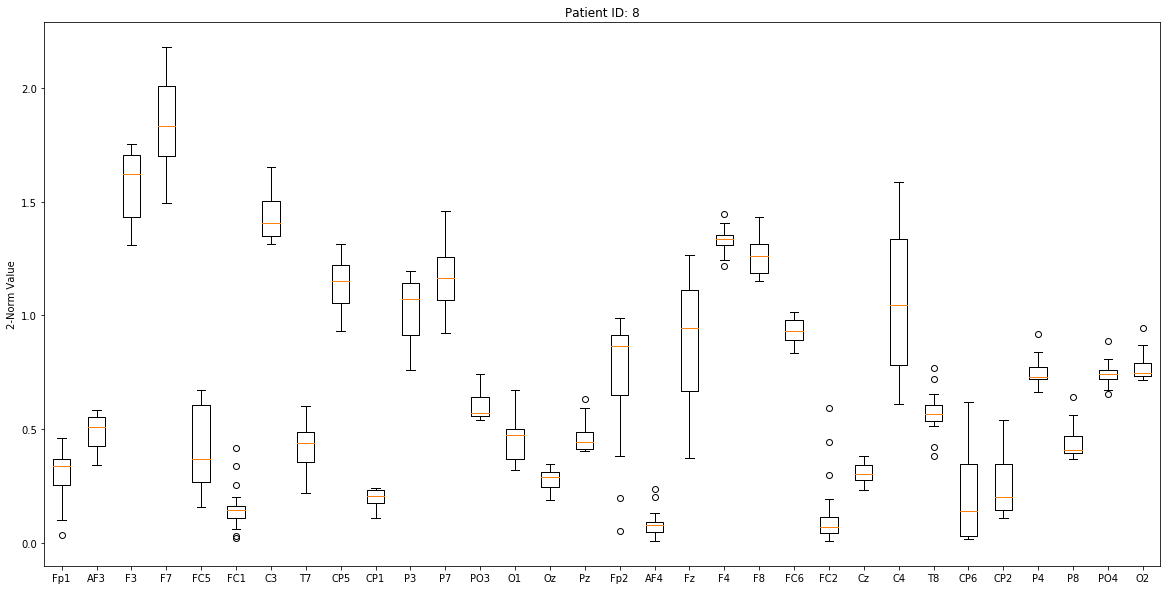

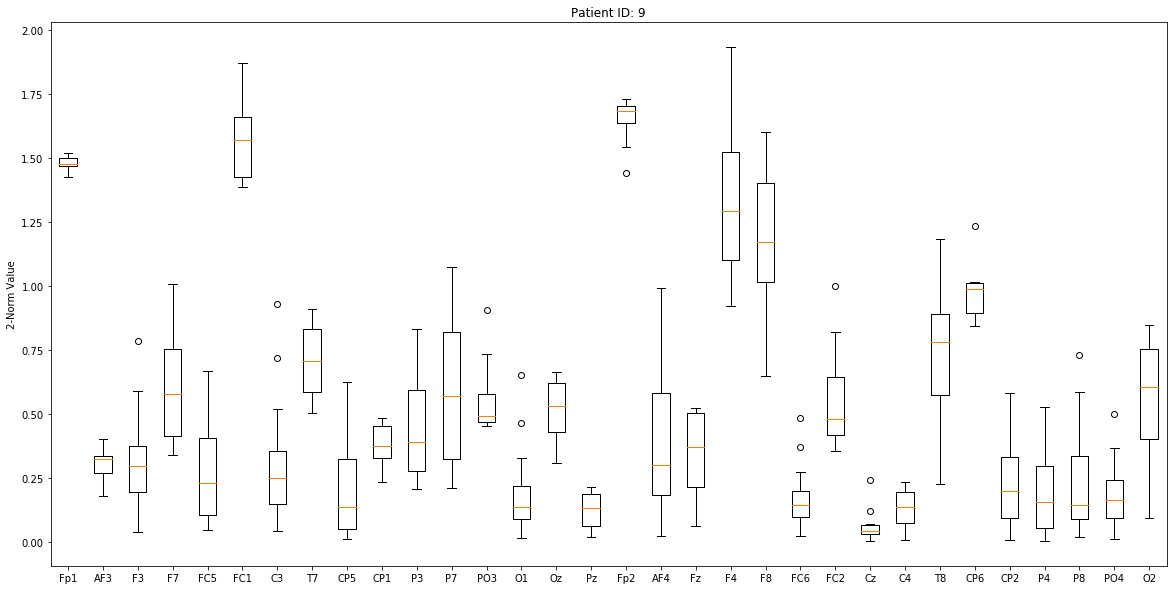

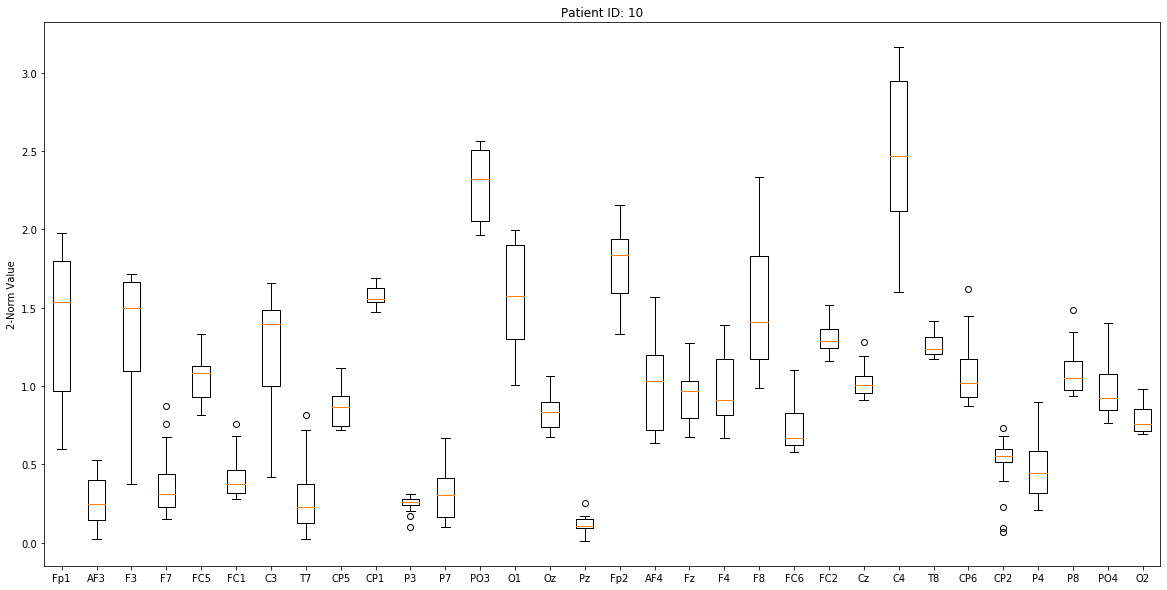

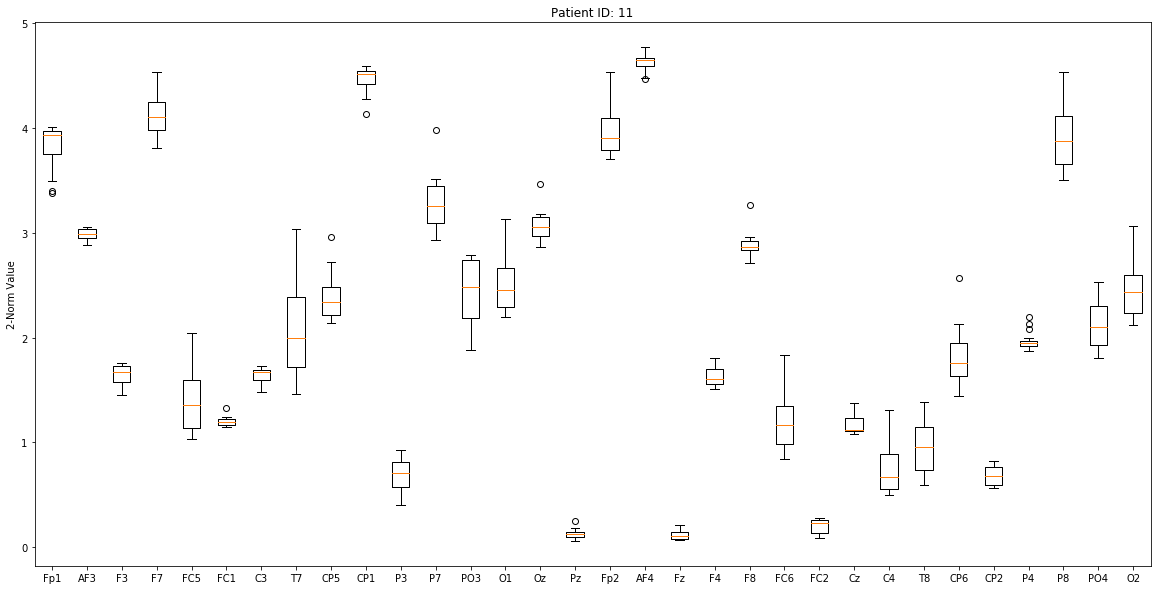

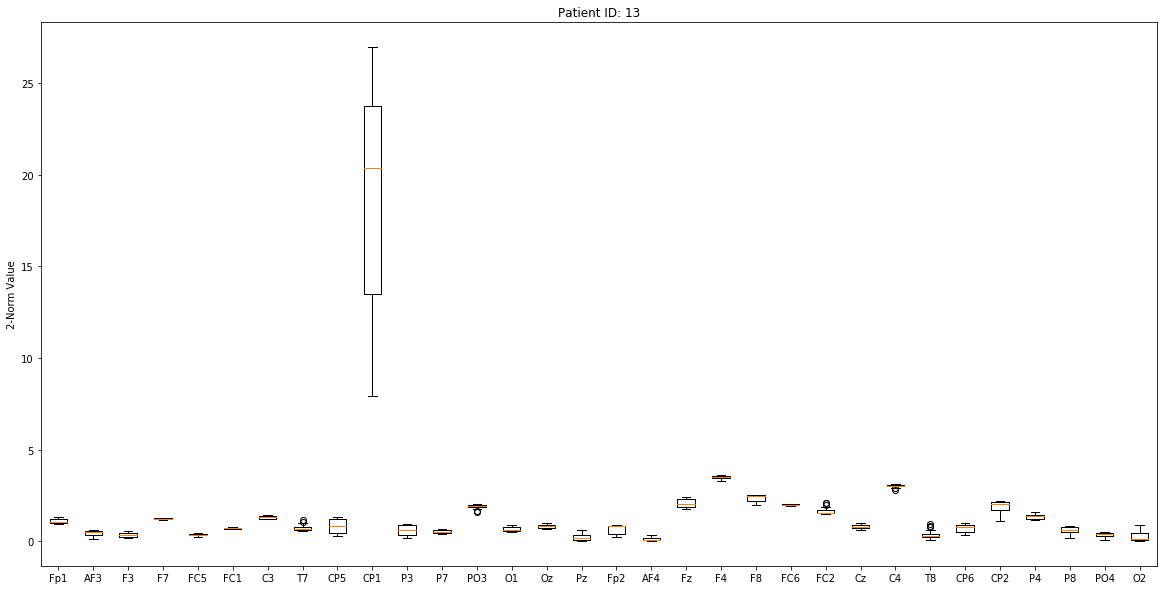

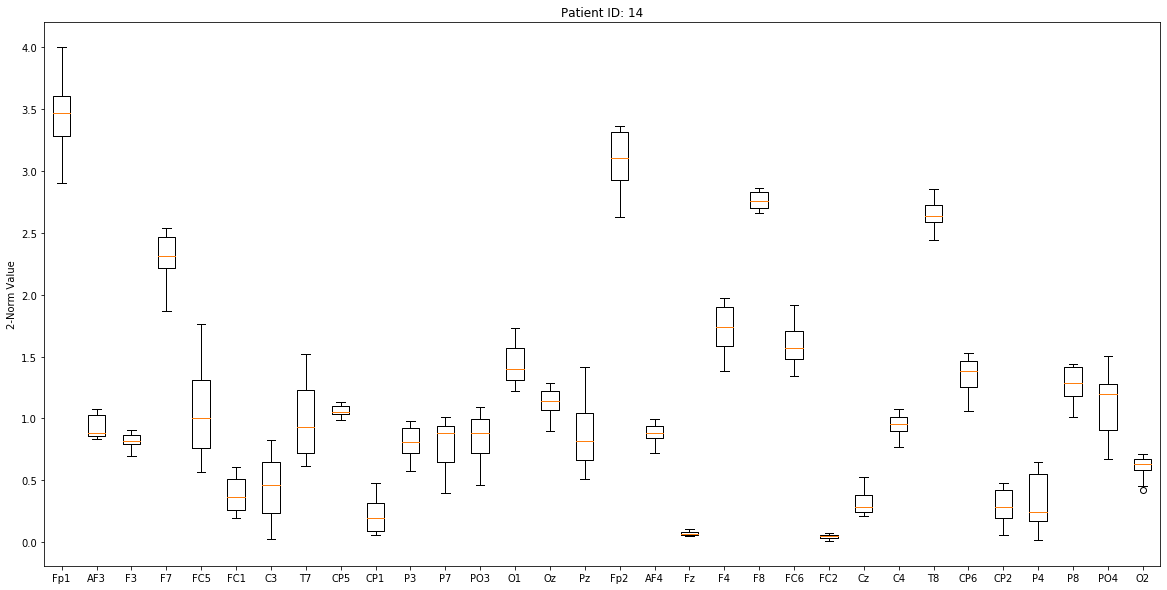

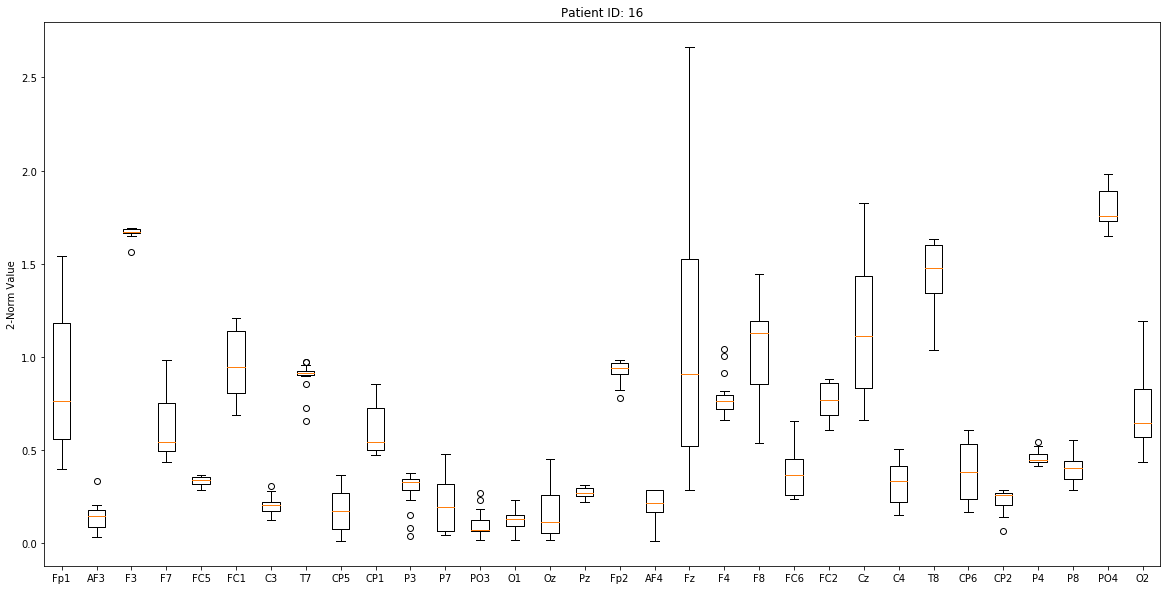

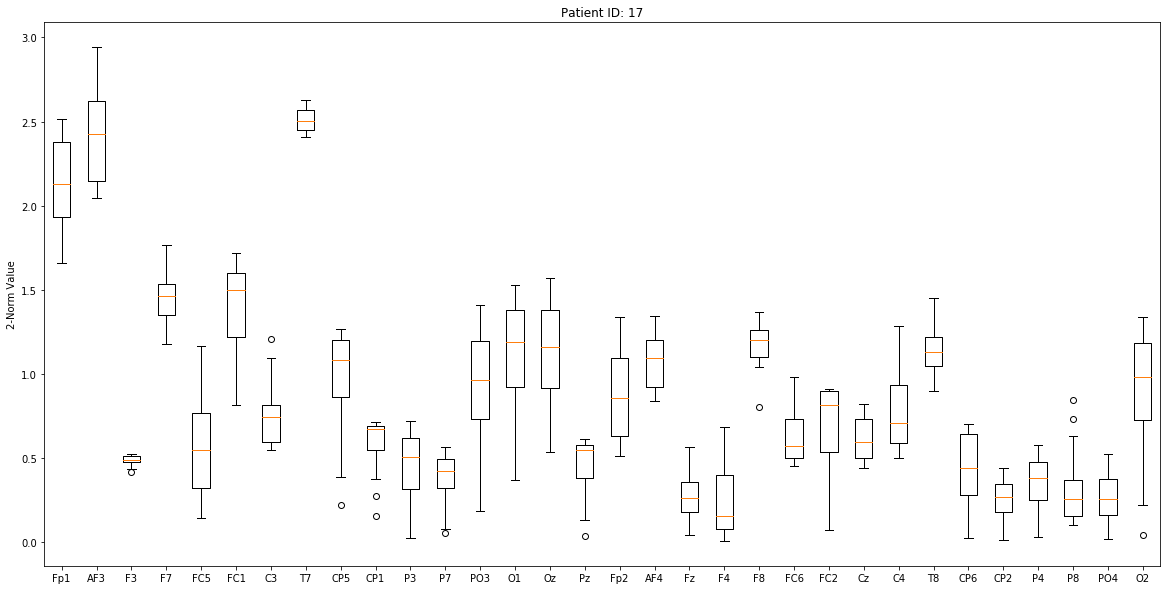

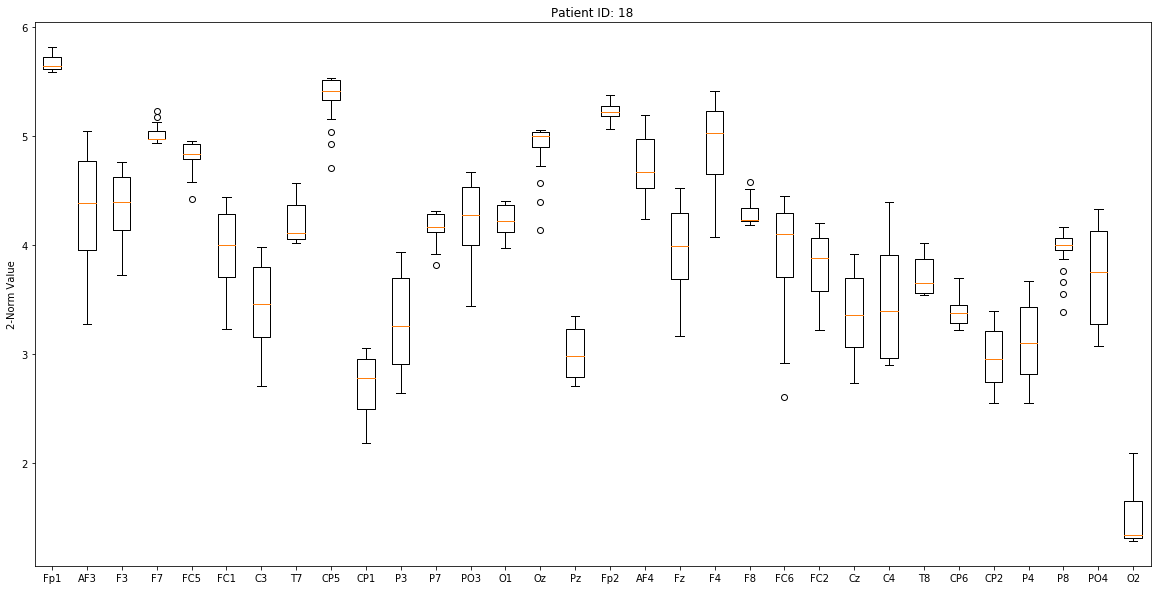

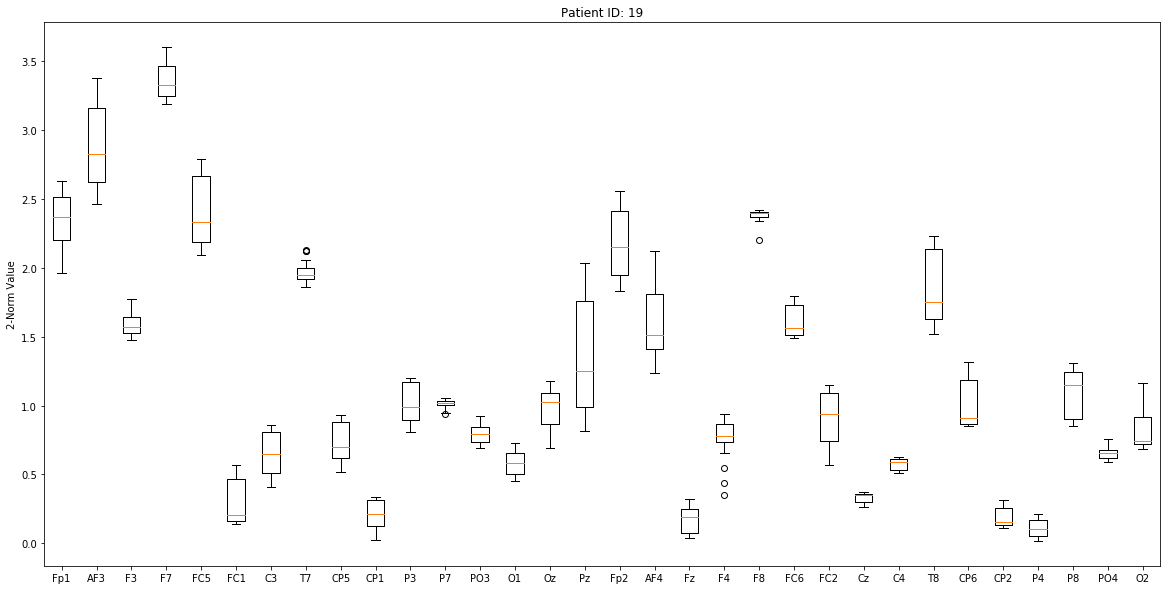

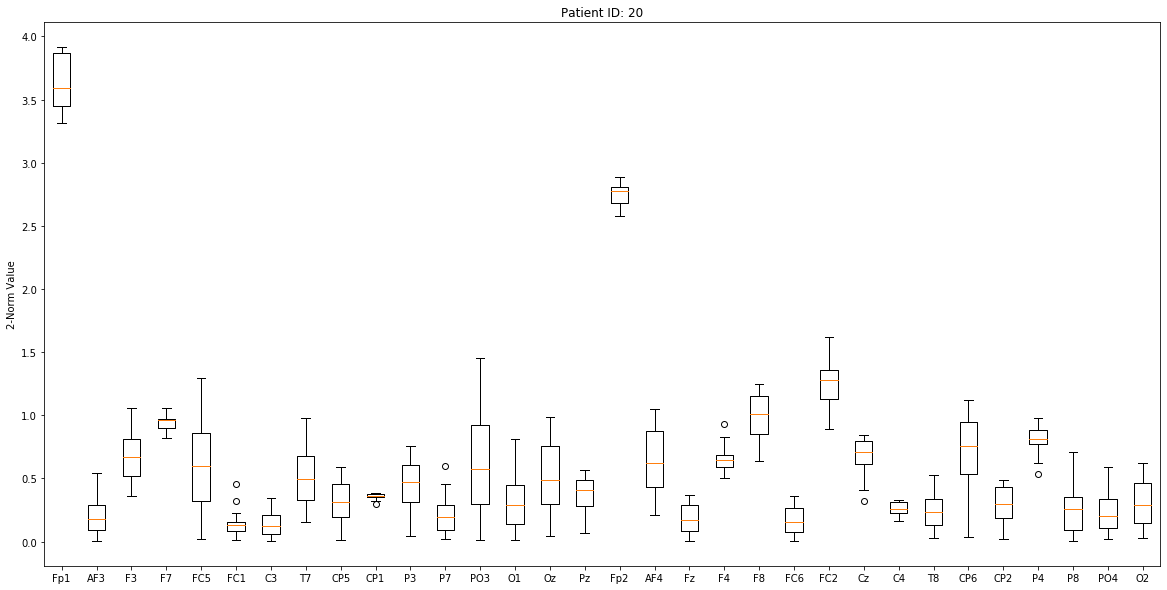

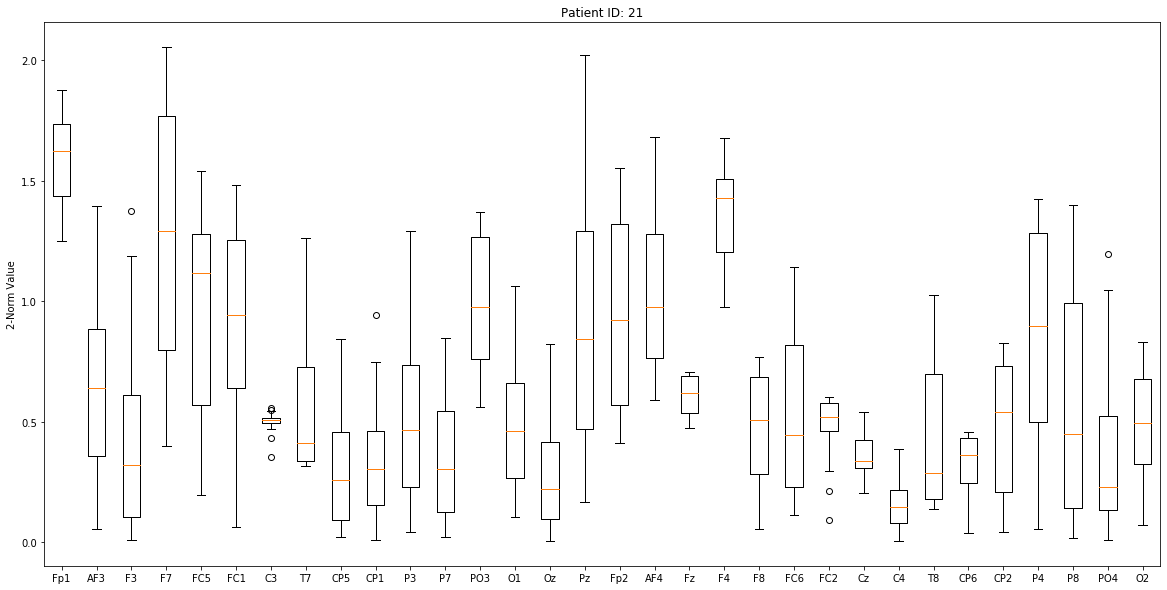

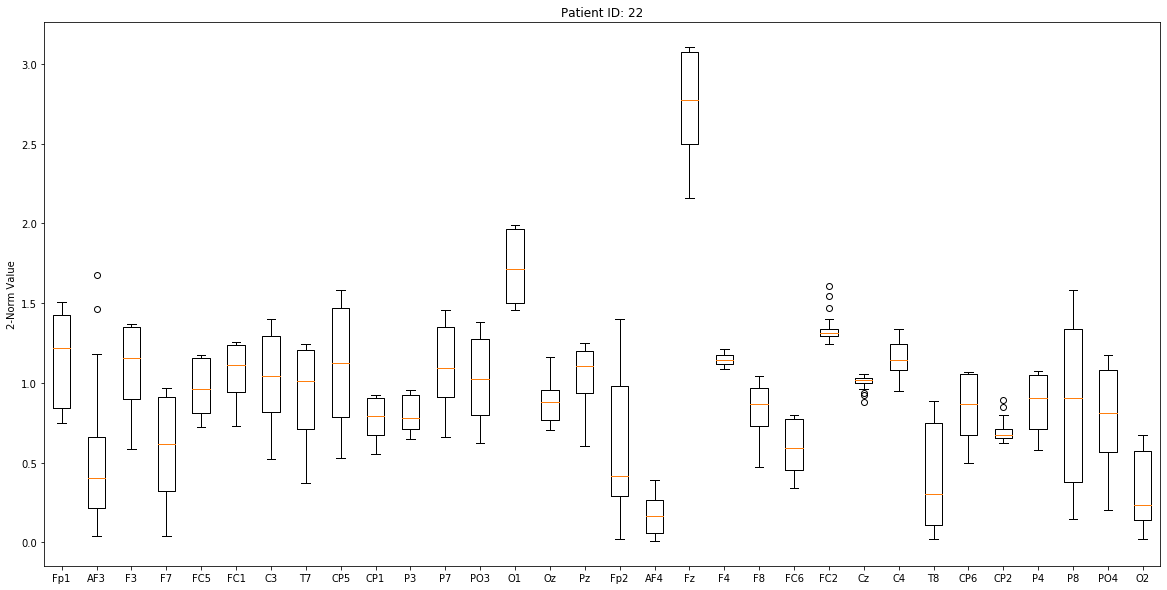

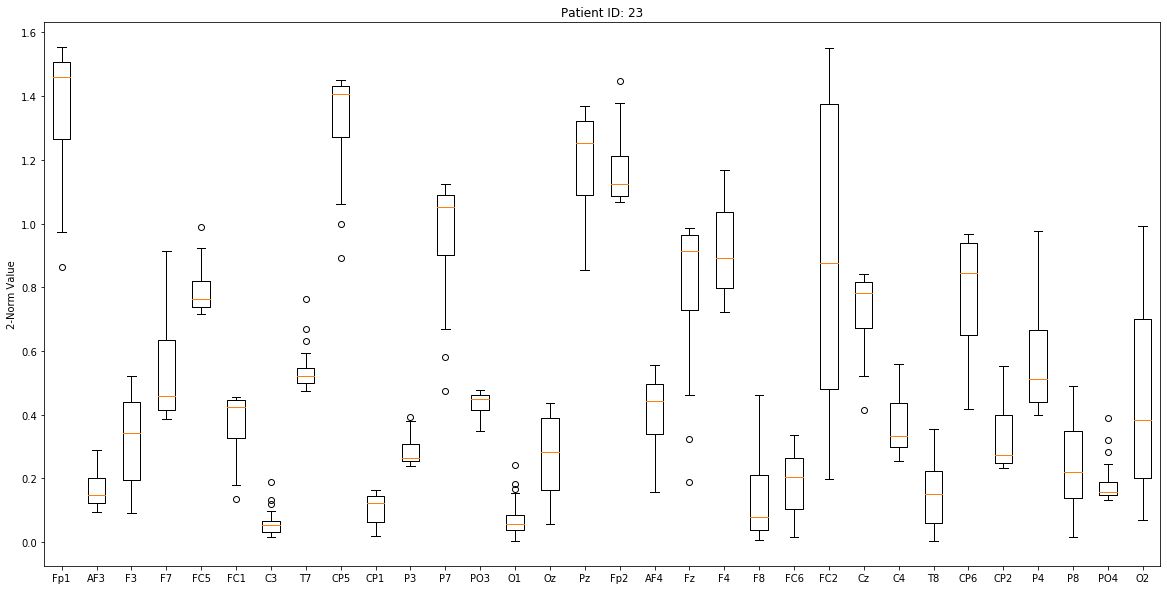

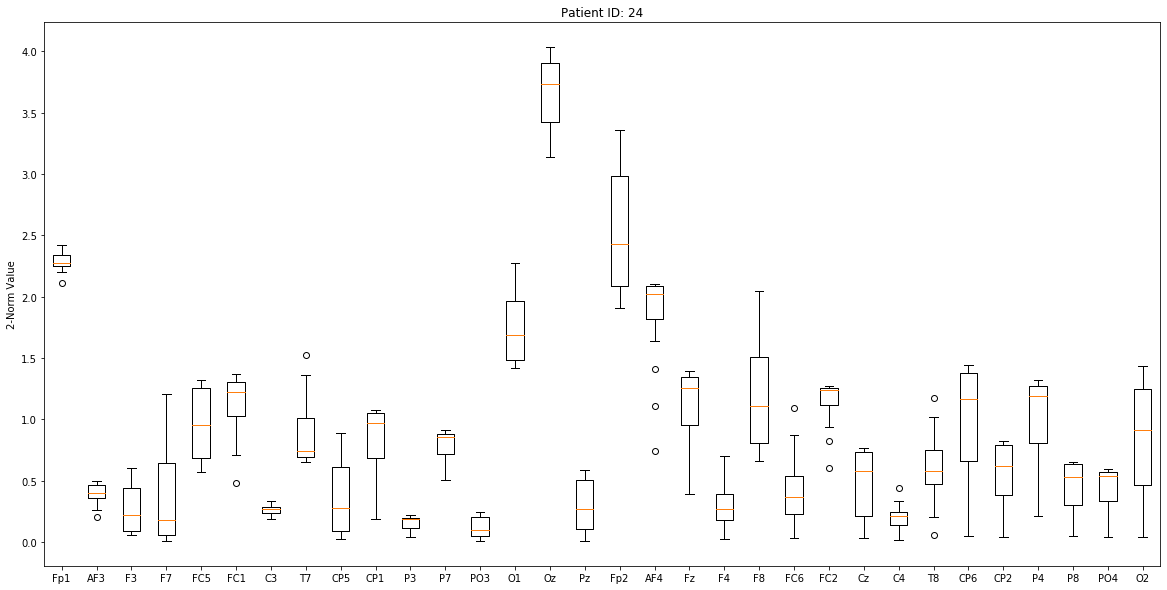

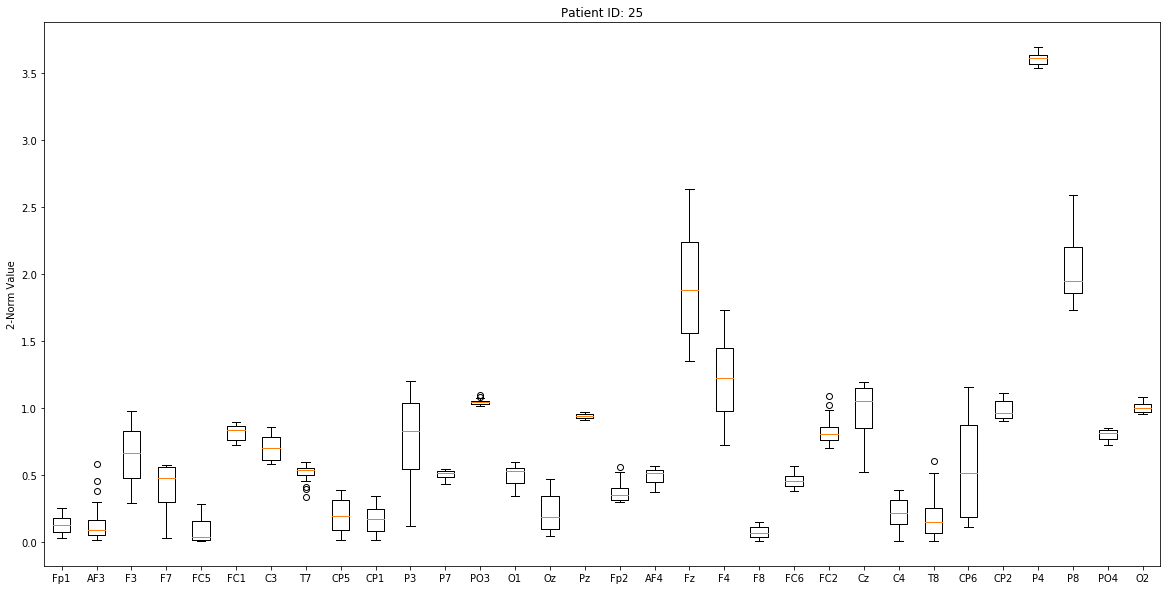

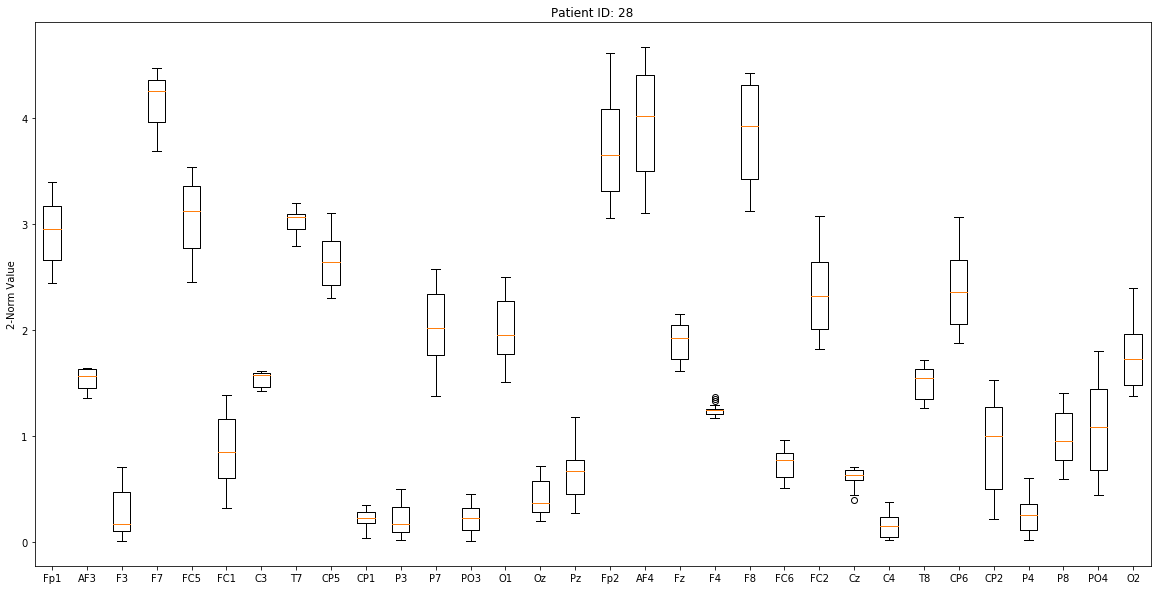

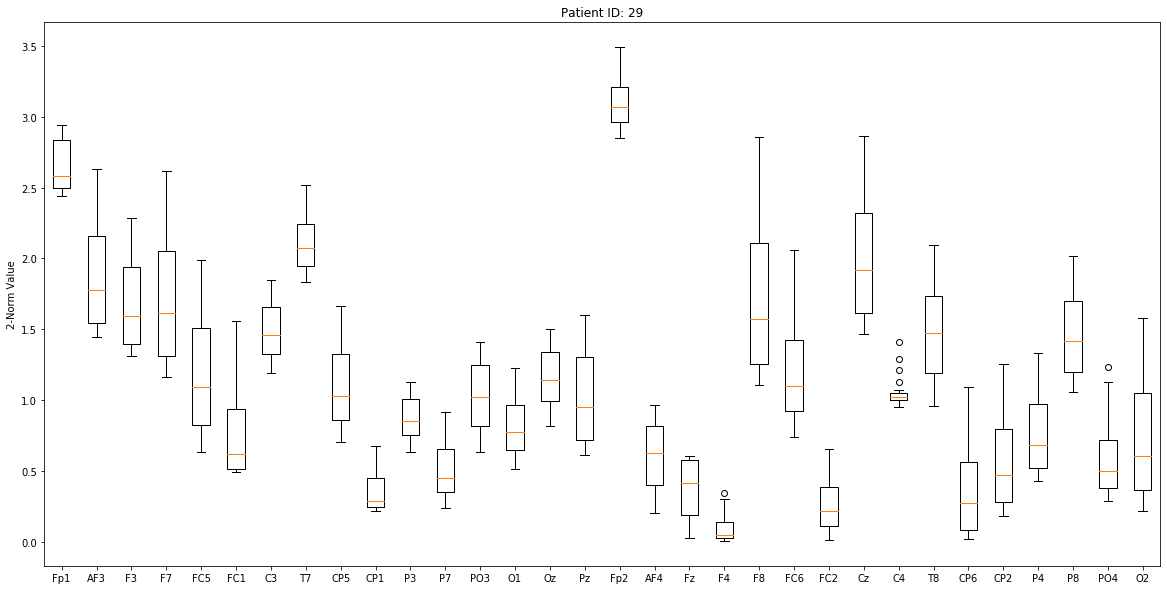

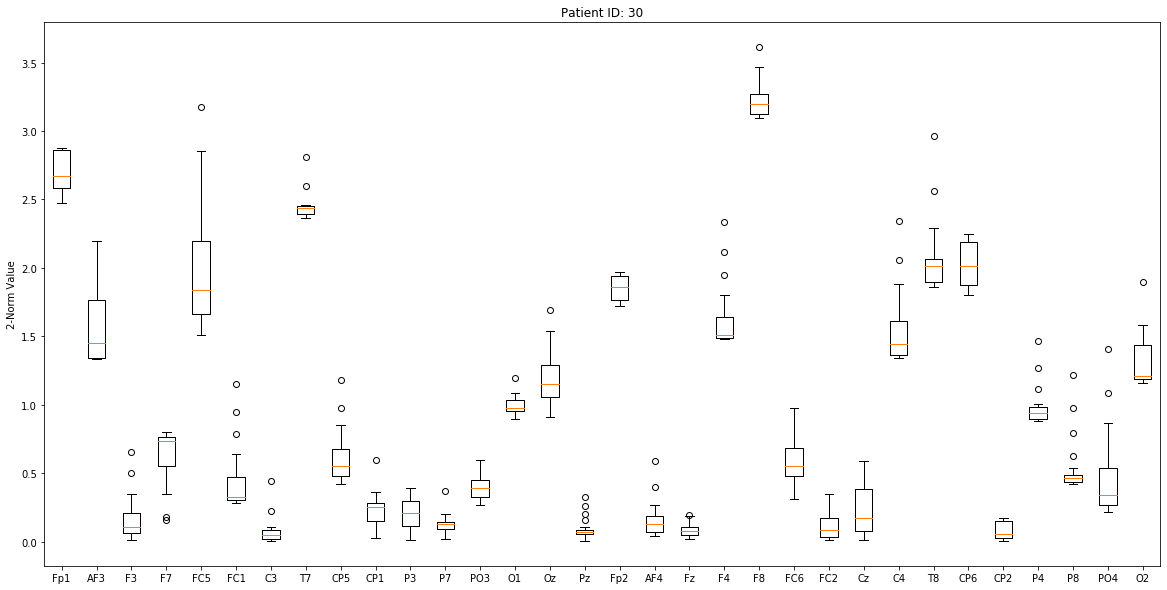

In [0]:
for id_val in range(1,31):
  #Plot all 30 patients channel distributions... We will determine the outlier!
  if (id_val == 12) or (id_val == 15) or (id_val == 26) or (id_val == 27):
    continue #These id's were not used within this half of the HCI experiment
  id_df = pd.DataFrame(data_dict[id_val])
  data = []
  for ch in chs:
    data.append(id_df[ch].to_numpy())

  fig0, ax0 = plt.subplots(figsize=(20,10))
  ax0.set_title('Patient ID: ' + str(id_val))
  ax0.boxplot(data)
  ax0.set_xticklabels(chs)
  ax0.set_ylabel('2-Norm Value')

plt.show()
